In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pickle
from glob import glob
from read_roi import read_roi_zip

In [38]:
path_spikes = "/Users/bengieru/MLN/data/Johan_Clean_Traces_Features_and_Spikes/"
path_rois = "/Users/bengieru/MLN/data/sarah_ROI/"
path_subjects = "/Users/bengieru/MLN/subjects/"

def load_obj(path, name):
    with open(path + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def read_roi(path, subject_roi):
    
    roi = read_roi_zip(glob(path + subject_roi +'.zip')[0])
    n = len(roi)
    
    for i, R in enumerate(roi):
        x = roi[R]['x']
        y = roi[R]['y']
    return(n)

def bin_time_series(array, binsize, gaussian = True, **kwargs):
    
    binned_spikes = []
    
    for i in range(len(array)):
        A = array[i].reshape(binsize, int(8000/binsize))
        if gaussian:
            A = gaussian_filter(A,kwargs['sigma'])
        binned_spikes.append(A)
        
    return(np.array(binned_spikes))

def find_bin_size(array, spike_per_layer):
    
    n, t, l = array.shape
    fouls = []
    
    for i in range(n):
        for j in range(l):
            if len(np.nonzero(array[i,:,j])[0]) < spike_per_layer:
                fouls.append('neuron %d in layer %d doesnt have enough spikes'%(i,j))
                
    return(fouls)
    
subjects = load_obj(path_subjects, 'subjects')

subject_names = subjects['het'] + subjects['wt']

epochs = ['_baseline', '_early', '_pre']

In [28]:
all_spikes = {}
for e in subject_names:
    for f in epochs:
        n = read_roi(path_rois, e + f )
        spike = open(path_spikes + e + f + "_spikes_complexity.csv", "r")
        reader_spike = csv.reader(spike)
        spikes = np.zeros((n,8000))
        for i,line in enumerate(reader_spike):
            for j in range(len(line)):
                spikes[i][j] = line[j]
        
        all_spikes[e+f] = spikes

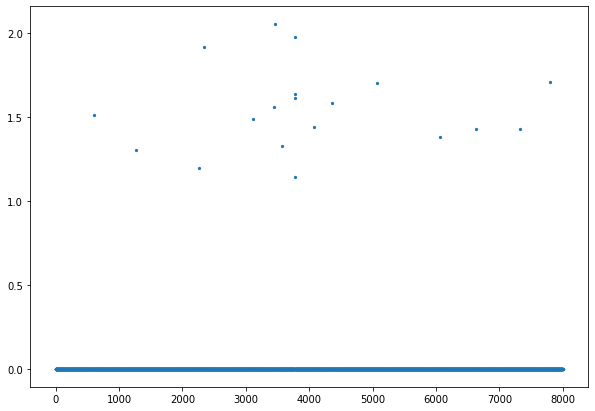

In [36]:
x = np.linspace(0,7999,8000)
fig,ax = plt.subplots(1,1, figsize= (10,7))
ax.scatter(x,all_spikes['m_1_session_1_baseline'][52], s = 5)

In [68]:
k=[]
for e in subject_names:
    for f in epochs:
        binned = bin_time_series(all_spikes[e+f], 2000, gaussian = False)
        k.append(find_bin_size(binned,5))

In [69]:
k

[['neuron 3 in layer 1 doesnt have enough spikes',
  'neuron 3 in layer 2 doesnt have enough spikes',
  'neuron 4 in layer 1 doesnt have enough spikes',
  'neuron 4 in layer 2 doesnt have enough spikes',
  'neuron 11 in layer 0 doesnt have enough spikes',
  'neuron 11 in layer 1 doesnt have enough spikes',
  'neuron 11 in layer 2 doesnt have enough spikes',
  'neuron 11 in layer 3 doesnt have enough spikes',
  'neuron 12 in layer 0 doesnt have enough spikes',
  'neuron 12 in layer 1 doesnt have enough spikes',
  'neuron 12 in layer 2 doesnt have enough spikes',
  'neuron 12 in layer 3 doesnt have enough spikes',
  'neuron 13 in layer 0 doesnt have enough spikes',
  'neuron 13 in layer 1 doesnt have enough spikes',
  'neuron 13 in layer 2 doesnt have enough spikes',
  'neuron 13 in layer 3 doesnt have enough spikes',
  'neuron 14 in layer 0 doesnt have enough spikes',
  'neuron 14 in layer 1 doesnt have enough spikes',
  'neuron 14 in layer 2 doesnt have enough spikes',
  'neuron 14 in 